In [2]:
import xarray as xr
import cartopy
import matplotlib.pyplot as plt

---
### **Load the data & select the area of interest**

In [7]:
# load data, select variable 'precip'
pr =  xr.open_dataset("chirps-daily-p25.nc").precip

# select just the area of interest
pr = pr.sel(longitude = slice(7, 24), latitude = slice(8,16))

---
### **Map of monthly mean precipitation**

/home/clair/miniconda3/envs/tmp/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


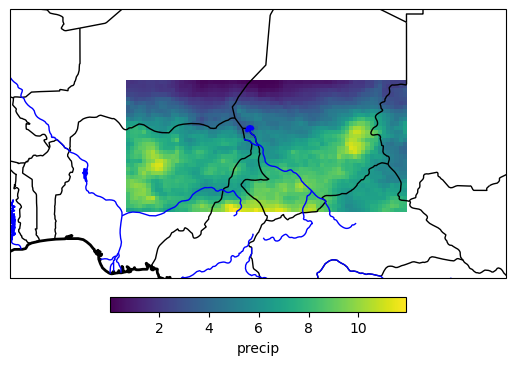

In [6]:
# get average precipitation during September 2022
pr_sep = pr.sel(time = slice("2022-08", "2022-10")).mean("time")

# to add borders etc, we have to tell Cartopy which projection to use
pr_sep.plot(subplot_kws = {"projection" : cartopy.crs.PlateCarree()},
                                           cbar_kwargs = {"location" : "bottom", "fraction" : 0.04, "pad" : 0.05})   # this bit just moves & resizes the colourbar

# we can now add coastlines and country borders separately
ax = plt.gca()  # this just tells Python which plot to add the features to
ax.coastlines(lw = 2)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.RIVERS, color = "blue")
ax.add_feature(cartopy.feature.LAKES, color = "blue")

# you can also show a larger surrounding region, if that helps
ax.set_extent((0,30,4,20))

---
### **Time series: annual maxima of n-day accumulated precipitation**

In [4]:
# get time series of regional precip
pr_regional = pr.mean(["latitude", "longitude"])

# compute n-day rolling average of precipitation (by default, this assigns the value to the last day)
pr_nday = pr_regional.rolling(time = 30).mean()

# get annual maxima of n-day rolling average precipitation
nday_max = pr_nday.resample(time = "AS").max()

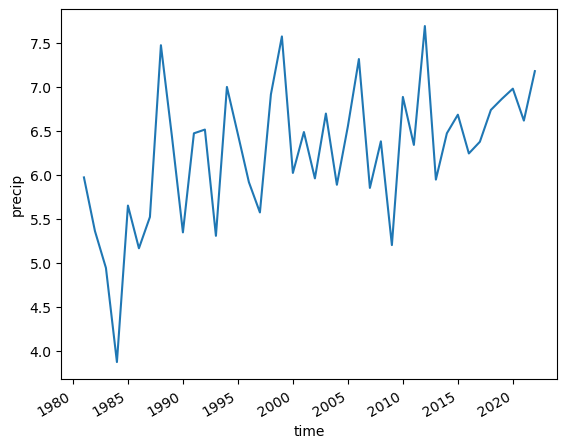

In [5]:
nday_max.plot()

In [6]:
# tidy up times & column headers for easier upload to Climate Explorer
ts = nday_max.assign_coords(time = nday_max.time.dt.year).rename(time = "#time")

# save as text file
ts.to_dataframe().to_csv("chirps-daily.txt", sep = " ")

---
### **Regional monthly anomalies**

In [9]:
# get average precipitation during September 2022
anom_sep = pr.sel(time = "2022-09").mean("time") - pr.groupby("time.month")[9].mean("time")

/home/clair/miniconda3/envs/tmp/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


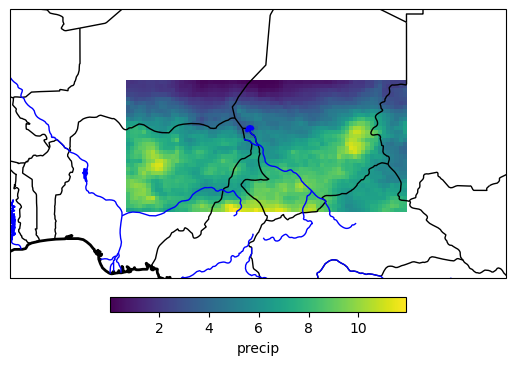

In [6]:
# to add borders etc, we have to tell Cartopy which projection to use
pr_sep.plot(subplot_kws = {"projection" : cartopy.crs.PlateCarree()},
                                           cbar_kwargs = {"location" : "bottom", "fraction" : 0.04, "pad" : 0.05})   # this bit just moves & resizes the colourbar

# we can now add coastlines and country borders separately
ax = plt.gca()  # this just tells Python which plot to add the features to
ax.coastlines(lw = 2)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.RIVERS, color = "blue")
ax.add_feature(cartopy.feature.LAKES, color = "blue")

# you can also show a larger surrounding region, if that helps
ax.set_extent((0,30,4,20))